<p>
<font size='5' face='Georgia, Arial'>IIC2115 - Programación como herramienta para la ingeniería</font><br>
</p>

# Análisis de datos en Python: ejemplo real de uso con información de la EOD 2012
(Los mayores agradecimientos a **Eduardo Graells-Garrido** por los ejemplos usados a continuación)

(Se recomienda fuertemente trabajar este archivo en Google Colab)

En este ejemplo se analiza la encuesta Origen Destino de Santiago, realizada el año 2012. La Encuesta Origen-Destino de Santiago, efectuada por última vez el año 2012, es el instrumento principal que utilizan las autoridades para tomar decisiones respecto a transporte en la ciudad. Consistió en entrevistar a los residentes de más de 18000 hogares haciéndoles la siguiente pregunta:

> ¿Qué viajes hiciste ayer?

Las personas encuestadas responden a través de un diario de viaje. En este diario incluyen todos los datos pertinentes de sus viajes: a qué hora lo iniciaron, a qué hora terminaron, los puntos de origen y destino (coordenadas), el propósito del viaje, el/los modo(s) de viaje utilizados, etc. También incluye información socio-demográfica de cada persona que responde.

La encuesta es representativa a nivel comunal. Esto quiere decir que podemos sacar conclusiones sobre como se moviliza la población de Providencia, pero no de un barrio específico de la comuna. Puede ser que exista información de ese barrio específico, pero no podemos sacar conclusiones extrapolables al barrio completo.

## Datasets

En este ejemplo trabajaremos con la base de datos de la EOD disponible en la página de datos del Gobierno disponible en el siguiente link.

  * [Encuesta Origen-Destino Santiago 2012](http://datos.gob.cl/dataset/31616)

Con el comando **git clone** descargaremos a la memoria de este notebook la información requerida para trabajar.

In [1]:
!git clone https://github.com/carnby/carto-en-python.git 

Cloning into 'carto-en-python'...
Updating files:  96% (250/260)
Updating files:  97% (253/260)
Updating files:  98% (255/260)
Updating files:  99% (258/260)
Updating files: 100% (260/260)
Updating files: 100% (260/260), done.



## Previo

Primero vamos a importar alguna de la librerías descritas en el primer notebook de este capíutlo.

Usaremos:

* `numpy` (vectores)
* `pandas`(DataFrames)
* `matplotlib` (visualización de bajo nivel)
* `seaborn` (visualización estadística). 

Ya tienen experiencia con algunas de estas cuatro bibliotecas, pero con este ejemplo profundizaremos en las dos últimas.

## `matplotlib`

`matplotlib` es una biblioteca de **bajo nivel** para visualización en Python, con un paradigma **imperativo**.

  * De bajo nivel quiere decir que entrega las primitivas gráficas necesarias para crear visualizaciones más complejtas.
  * Imperativo quiere decir que se focaliza en las instrucciones que recibe la biblioteca, ya que no _abstrae_ las operaciones o codificaciones visuales de modo que operemos sobre éstas.

## `seaborn`

`seaborn` es una biblioteca que se construye _sobre_ `matplotlib`, y que incluye gráficos estadísticos y algunas funcionalidades avanzadas de modelamiento y reducción de complejidad. Esto permite _hacer más con menos código_. Al mismo tiempo, `seaborn` incluye opciones para trabajar con la codificación visual de manera más efectiva que `matplotlib`, por ejemplo, a través de la facilitación de elección de paletas de colores, o de la detección de parámetros siguiendo buenas prácticas.

Y para completar más esta oferta, `seaborn` es directamente compatible con `pandas`. `matplotlib` también, pero no de manera nativa, por lo que todo lo que se relaciona con `pandas` requiere más trabajo. En el ejemplo de abajo vemos que no solamente hizo el gráfico, sino que incluso etiquetó automáticamente el eje $x$. Sin embargo, en `seaborn` la idea no es reemplazar los métodos de `matplotlib`. En realidad, lo que haremos será trabajar de manera diferente. Lo primero que debemos hacer es cambiar el formato de los datos. En `seaborn` se trabaja con **tidy data**. O datos ordenaditos.

(Aquí hay dos explicaciones interesantes sobre _tidy data_: en [Python](http://www.jeannicholashould.com/tidy-data-in-python.html). El paper que explica el razonamiento detrás está [aquí](http://courses.had.co.nz.s3-website-us-east-1.amazonaws.com/12-rice-bdsi/slides/07-tidy-data.pdf)).

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Esto configura la apariencia de los gráficos utilizando configuraciones de seaborn
sns.set(context='poster', style='ticks', palette='inferno')

# Esto es una instrucción de Jupyter que hace que los gráficos se desplieguen en el notebook
%matplotlib inline

# la encuesta tiene tantas columnas que hacemos esto para imprimirlas todas
# pd.set_option('max_columns', 1000)
pd.options.display.max_rows = 1000

## Los datos

Esto involucra:

  * Inspeccionar el contenido de la base de datos para saber qué cargar.
  * Ajustar las perillas de los métodos para cargar datos, de modo que lean lo que queremos que leamos, y no se equivoquen.
  * Realizar visualización exploratoria para saber si está todo en orden.
  * Eliminar observaciones que no sirven, sea porque vienen _sucias_, _incompletas_, o bien no son relevantes para nuestro análisis.
  
  
El siguiente comando muestra los parámetros de la EOD.

In [3]:
# El comando ls solo funcionará en sistemas operativos tipo UNIX en jupyter, esto es Linux y MacOS, y Google Colab
# Sin embargo en Windows funcionará si se utiliza la powershell
!ls ./carto-en-python/input/2012_eod_stgo/EOD_STGO/Tablas_parametros/

Actividad.csv
ActividadDestino.csv
ActividadEmpresa.csv
AdultoMayor.csv
Autopista.csv
CirculacionBicicleta.csv
CodigoTiempo.csv
Combustible.csv
Comuna.csv
Comunas.csv
ConoceSantiago.csv
Discapacidad.csv
Donde Estudia.csv
EdadVehiculo.csv
EstacionMetro.csv
EstacionMetroCambio.csv
EstacionTren.csv
Estaciona.csv
EstacionaBicicleta.csv
Estudios.csv
Formapago.csv
HorarioMetro.csv
IngresoImputado.csv
JornadaTrabajo.csv
LicenciaConducir.csv
MarcaVehiculo.csv
MedioViajeRestriccion.csv
MediosUsados.csv
Modo - copia.csv
Modo.csv
ModoAgregado.csv
ModoDifusion.csv
ModoMotor.csv
ModoPriPub.csv
ModoestacionaBicicleta.csv
NoUsaAutopista.csv
NoUsaTransantiago.csv
NoViaja.csv
Ocupacion.csv
PaseEscolar.csv
Periodo.csv
Propiedad.csv
PropiedadBicicleta.csv
PropiedadVehiculo.csv
Proposito.csv
PropositoAgregado.csv
RecorridoTransantiago.csv
Relacion.csv
Relacion.csvtest
Sector.csv
SelloVerde.csv
Sexo.csv
SexoViaje.csv
Temporada.csv
TiempoMedio.csv
TieneIngresos.csv
TipoDia.csv
TipoVeh.csv
TramoIngreso.csv
U

La siguiente consulta muestra las tablas de información de la EOD.

In [4]:
!ls ./carto-en-python/input/2012_eod_stgo/EOD_STGO/

DistanciaViaje.csv
Edadpersonas.csv
Etapas.csv
Hogares.csv
Tablas_parametros
Vehiculo.csv
ViajesDifusion.csv
personas.csv
viajes.csv


Si queremos visualizar, por ejemplo información de viajes:

In [5]:
trip_data = pd.read_csv('./carto-en-python/input/2012_eod_stgo/EOD_STGO/viajes.csv', sep=';')
trip_data.head()

,Hogar,Persona,Viaje,Etapas,ComunaOrigen,ComunaDestino,SectorOrigen,SectorDestino,ZonaOrigen,ZonaDestino,...,TiempoMedio,Periodo,MinutosDespues,CuadrasDespues,FactorLaboralNormal,FactorSabadoNormal,FactorDomingoNormal,FactorLaboralEstival,FactorFindesemanaEstival,CodigoTiempo
0,173431,17343102,1734310202,1,94.0,94.0,2.0,2.0,400,407,...,3.0,6.0,6.0,1.0,"1,00000000",NaN,NaN,NaN,NaN,0.0
1,173441,17344101,1734410101,2,94.0,71.0,2.0,3.0,407,307,...,4.0,5.0,5.0,1.0,"1,12721985",NaN,NaN,NaN,NaN,0.0
2,173441,17344101,1734410102,2,71.0,94.0,3.0,2.0,307,407,...,3.0,5.0,10.0,2.0,"1,12721985",NaN,NaN,NaN,NaN,0.0
3,173441,17344103,1734410301,2,94.0,91.0,2.0,3.0,407,437,...,2.0,5.0,10.0,2.0,"1,12721985",NaN,NaN,NaN,NaN,0.0
4,173441,17344103,1734410302,2,91.0,94.0,3.0,2.0,437,407,...,5.0,4.0,10.0,2.0,"1,05276356",NaN,NaN,NaN,NaN,0.0


In [6]:
trip_data.columns

Index(['Hogar', 'Persona', 'Viaje', 'Etapas', 'ComunaOrigen', 'ComunaDestino',
       'SectorOrigen', 'SectorDestino', 'ZonaOrigen', 'ZonaDestino',
       'OrigenCoordX', 'OrigenCoordY', 'DestinoCoordX', 'DestinoCoordY',
       'Proposito', 'PropositoAgregado', 'ActividadDestino', 'MediosUsados',
       'ModoAgregado', 'ModoPriPub', 'ModoMotor', 'HoraIni', 'HoraFin',
       'HoraMedia', 'TiempoViaje', 'TiempoMedio', 'Periodo', 'MinutosDespues',
       'CuadrasDespues', 'FactorLaboralNormal', 'FactorSabadoNormal',
       'FactorDomingoNormal', 'FactorLaboralEstival',
       'FactorFindesemanaEstival', 'CodigoTiempo'],
      dtype='object')

Por ejemplo, notemos que las columnas ComunaOrigen y ComunaDestino tienen valores numéricos que deben ser IDs.

In [7]:
municipalities = pd.read_csv('./carto-en-python/input/2012_eod_stgo/EOD_STGO/Tablas_parametros/Comuna.csv', sep=',')
municipalities.head()

,Id,Comuna
0,10,CALAMA
1,13,COPIAPÓ
2,19,LA SERENA
3,21,COQUIMBO
4,25,OVALLE


Entonces, seguramente las comunas de origen/destino de un viaje contienen esos valores, pero codificados.

In [8]:
trip_data.merge(municipalities, left_on='ComunaOrigen', right_on='Id').iloc[0]

Hogar                            173431
Persona                        17343102
Viaje                        1734310202
Etapas                                1
ComunaOrigen                       94.0
ComunaDestino                      94.0
SectorOrigen                        2.0
SectorDestino                       2.0
ZonaOrigen                          400
ZonaDestino                         407
OrigenCoordX                335208,7188
OrigenCoordY                    6288387
DestinoCoordX               338812,3125
DestinoCoordY                   6292391
Proposito                           7.0
PropositoAgregado                   3.0
ActividadDestino                    NaN
MediosUsados                          2
ModoAgregado                          2
ModoPriPub                            2
ModoMotor                             1
HoraIni                           22:30
HoraFin                           23:40
HoraMedia                         23:05
TiempoViaje                        70.0


In [9]:
def decode_column(df, fname, col_name, index_col='Id', target_col=None, value_col=None, sep=';', encoding='utf-8'):
    '''
    param :df: DataFrame del que leeremos una columna.
    param :fname: nombre del archivo que contiene los valores a decodificar.
    param :col_name: nombre de la columna que queremos decodificar.
    param :index_col: nombre de la columna en el archivo @fname que tiene los índices que codifican @col_name
    param :value_col: nombre de la columna en el archivo @fname que tiene los valores decodificados
    param :sep: carácter que separa los valores en @fname. 
    param :encoding: identificación del _character set_ que utiliza el archivo. Usualmente es utf-8, si no funciona,
                     se puede probar con iso-8859-1.
    '''
    if value_col is None:
        value_col = 'value'
        
    if target_col is None:
        target_col = col_name
        
    values_df = pd.read_csv(fname, sep=sep, index_col=index_col, names=[index_col, value_col], header=0,
                            dtype={index_col: np.float64}, encoding=encoding)
    
    src_df = df.loc[:,(col_name,)]
    
    return pd.Series(src_df.join(values_df, on=col_name)[value_col], name=target_col)

decode_column(trip_data.head(10), './carto-en-python/input/2012_eod_stgo/EOD_STGO/Tablas_parametros/Comuna.csv', 'ComunaOrigen', sep=',')

0         MAIPÚ
1         MAIPÚ
2    LAS CONDES
3         MAIPÚ
4         ÑUÑOA
5         MAIPÚ
6      SANTIAGO
7         MAIPÚ
8         MAIPÚ
9         MAIPÚ
Name: ComunaOrigen, dtype: object

Estudiaremos el uso de modos de viaje. Hay una tabla de parámetros que tiene esa información:

In [10]:
# El comando head solo funcionará en sistemas operativos tipo UNIX en jupyter, esto es Linux y MacOS, y Google Colab
# En Windows no existe el comando

!head ./carto-en-python/input/2012_eod_stgo/EOD_STGO/Tablas_parametros/Modo.csv

Id;Modo
1;Auto Chofer
2;Bus alimentador
3;Bus troncal
4;Metro
5;Taxi colectivo
6;FurgÃ³n escolar, como pasajero
7;Taxi o radiotaxi
8;Enteramente a pie
9;Bicicleta


In [11]:
trip_data.MediosUsados.value_counts()

8                33827
1                16782
17                9650
3                 8924
2                 5395
4                 4998
9                 3868
5                 3428
6                 2828
2;4               2054
12                1996
4;2               1991
3;3               1732
7                 1661
3;4               1541
4;3               1391
14                1222
2;3                978
3;2                955
11                 929
10                 489
2;2                423
2;4;2              409
13                 381
2;4;3              341
3;4;2              340
4;5                331
5;4                309
12;4               271
4;12               249
3;4;3              230
17;4               161
5;5                105
3;3;3              104
15                  97
3;5                 86
3;3;2               84
2;3;2               83
2;3;3               81
4;14                81
14;4                77
5;3                 72
4;7                 71
4;17       

Existe otra tabla llamada ViajesDifusion:

In [12]:
trip_mode = pd.read_csv('./carto-en-python/input/2012_eod_stgo/EOD_STGO/ViajesDifusion.csv', sep=';', index_col='Viaje')
trip_mode.head()

,ModoDifusion
Viaje,
1000100101,8
1000100102,8
1000100201,8
1000100202,8
1000100203,8


In [13]:
decode_column(trip_mode.sample(15), './carto-en-python/input/2012_eod_stgo/EOD_STGO/Tablas_parametros/ModoDifusion.csv', 'ModoDifusion', sep=';', index_col='ID', encoding='iso-8859-1')

Viaje
1749810103    Bicicleta
2103410202         Auto
1990810301     Caminata
2514710402        Otros
1557210101         Bip!
2625810401         Auto
2017810101     Caminata
1849610302         Bip!
1149800102         Bip!
2483220101    Bicicleta
2309610401         Auto
2437910401         Auto
1225310202         Bip!
3419720201     Caminata
2528120101         Auto
Name: ModoDifusion, dtype: object

Al parecer es más adecuada para lo que queremos.

In [14]:
trip_data.head().join(trip_mode)

,Hogar,Persona,Viaje,Etapas,ComunaOrigen,ComunaDestino,SectorOrigen,SectorDestino,ZonaOrigen,ZonaDestino,...,Periodo,MinutosDespues,CuadrasDespues,FactorLaboralNormal,FactorSabadoNormal,FactorDomingoNormal,FactorLaboralEstival,FactorFindesemanaEstival,CodigoTiempo,ModoDifusion
0,173431,17343102,1734310202,1,94.0,94.0,2.0,2.0,400,407,...,6.0,6.0,1.0,"1,00000000",NaN,NaN,NaN,NaN,0.0,NaN
1,173441,17344101,1734410101,2,94.0,71.0,2.0,3.0,407,307,...,5.0,5.0,1.0,"1,12721985",NaN,NaN,NaN,NaN,0.0,NaN
2,173441,17344101,1734410102,2,71.0,94.0,3.0,2.0,307,407,...,5.0,10.0,2.0,"1,12721985",NaN,NaN,NaN,NaN,0.0,NaN
3,173441,17344103,1734410301,2,94.0,91.0,2.0,3.0,407,437,...,5.0,10.0,2.0,"1,12721985",NaN,NaN,NaN,NaN,0.0,NaN
4,173441,17344103,1734410302,2,91.0,94.0,3.0,2.0,437,407,...,4.0,10.0,2.0,"1,05276356",NaN,NaN,NaN,NaN,0.0,NaN


Hagamos fast-forward :)

In [15]:
trip_data = (pd.read_csv('./carto-en-python/input/2012_eod_stgo/EOD_STGO/viajes.csv', sep=';', index_col='Viaje')
             .assign(ComunaOrigen=lambda x: decode_column(x, './carto-en-python/input/2012_eod_stgo/EOD_STGO/Tablas_parametros/Comuna.csv', 'ComunaOrigen', sep=','))
             .assign(ComunaDestino=lambda x: decode_column(x, './carto-en-python/input/2012_eod_stgo/EOD_STGO/Tablas_parametros/Comuna.csv', 'ComunaDestino', sep=','))
             .assign(SectorOrigen=lambda x: decode_column(x, './carto-en-python/input/2012_eod_stgo/EOD_STGO/Tablas_parametros/Sector.csv', 'SectorOrigen', sep=';'))
             .assign(SectorDestino=lambda x: decode_column(x, './carto-en-python/input/2012_eod_stgo/EOD_STGO/Tablas_parametros/Sector.csv', 'SectorDestino', sep=';'))
             .join(pd.read_csv('./carto-en-python/input/2012_eod_stgo/EOD_STGO/ViajesDifusion.csv', sep=';', index_col='Viaje'))
             .assign(ModoDifusion=lambda x: decode_column(x, './carto-en-python/input/2012_eod_stgo/EOD_STGO/Tablas_parametros/ModoDifusion.csv', 'ModoDifusion', sep=';', index_col='ID', encoding='iso-8859-1'))
             .assign(Proposito=lambda x: decode_column(x, './carto-en-python/input/2012_eod_stgo/EOD_STGO/Tablas_parametros/Proposito.csv', 'Proposito', sep=';'))
             .join(pd.read_csv('./carto-en-python/input/2012_eod_stgo/EOD_STGO/DistanciaViaje.csv', sep=';', index_col='Viaje'))
            )

trip_data.sample(10)

,Hogar,Persona,Etapas,ComunaOrigen,ComunaDestino,SectorOrigen,SectorDestino,ZonaOrigen,ZonaDestino,OrigenCoordX,...,FactorLaboralNormal,FactorSabadoNormal,FactorDomingoNormal,FactorLaboralEstival,FactorFindesemanaEstival,CodigoTiempo,ModoDifusion,DistEuclidiana,DistManhattan,Imputada
Viaje,,,,,,,,,,,,,,,,,,,,,
3096110102,309611,30961101,1,LAMPA,LAMPA,Norte,Norte,751,751,NaN,...,NaN,"1,48210391",NaN,NaN,NaN,NaN,Caminata,-1,-1,0
1551210102,155121,15512101,1,PROVIDENCIA,LAS CONDES,Oriente,Oriente,515,304,"348826,1875",...,"1,48210391",NaN,NaN,NaN,NaN,0.0,Bicicleta,4824,5556,0
2352310102,235231,23523101,2,SANTIAGO,PUENTE ALTO,Centro,Sur-Oriente,18,695,"346141,8125",...,"1,05276356",NaN,NaN,NaN,NaN,0.0,Bip! - Otros Público,16757,23538,0
1608110103,160811,16081101,1,LAS CONDES,LAS CONDES,Oriente,Oriente,289,288,"352683,7813",...,NaN,"1,48210391",NaN,NaN,NaN,NaN,Auto,1202,1452,0
2737420203,273742,27374202,1,SAN BERNARDO,LA FLORIDA,Sur,Sur-Oriente,773,233,"343429,6563",...,"1,48210391",NaN,NaN,NaN,NaN,0.0,Auto,10614,14437,0
1165210303,116521,11652103,1,EL BOSQUE,EL BOSQUE,Sur,Sur,119,119,NaN,...,NaN,NaN,NaN,"1,482103914",NaN,NaN,Caminata,-1,-1,0
1401010102,140101,14010101,1,NaN,LA FLORIDA,NaN,Sur-Oriente,0,219,0,...,"1,14387994",NaN,NaN,NaN,NaN,3.0,Auto,-1,-1,0
1340610501,134061,13406105,1,LA FLORIDA,MELIPILLA,Sur-Oriente,Extensión Sur-Poniente,194,807,"353412,3438",...,"1,04307354",NaN,NaN,NaN,NaN,0.0,Auto,60930,74541,0
2424410402,242441,24244104,1,QUINTA NORMAL,QUINTA NORMAL,Poniente,Poniente,571,571,NaN,...,"1,48210391",NaN,NaN,NaN,NaN,0.0,Caminata,475,-1,1


Todavía hay un par de asuntos que queremos resolver. Por ejemplo, los tiempos de viaje y las coordenadas geográficas. Antes de eso, limpiemos el dataset sacando valores nulos e inválidos.

In [16]:
trip_data = trip_data.dropna(subset=['HoraIni', 'HoraFin', 'SectorOrigen', 'SectorDestino', 'ComunaOrigen', 'ComunaDestino', 'Proposito', 'ModoDifusion'])

In [17]:
trip_data['HoraIni'] = trip_data.HoraIni.str.split(':').map(lambda x: pd.Timedelta(hours=int(x[0]), minutes=int(x[1])))
trip_data['HoraIni'].describe()

count                       108882
mean     0 days 13:35:43.841957348
std      0 days 04:38:51.409770086
min                0 days 00:00:00
25%                0 days 09:15:00
50%                0 days 13:30:00
75%                0 days 17:30:00
max                0 days 23:59:00
Name: HoraIni, dtype: object

In [18]:
trip_data['HoraFin'] = trip_data.HoraFin.str.split(':').map(lambda x: pd.Timedelta(hours=int(x[0]), minutes=int(x[1])))
trip_data['HoraFin'].describe()

count                       108882
mean     0 days 14:08:40.328428941
std      0 days 04:40:09.862649633
min                0 days 00:00:00
25%                0 days 10:00:00
50%                0 days 14:02:00
75%                0 days 18:10:00
max                0 days 23:59:00
Name: HoraFin, dtype: object

En algunos casos, la hora de fin es _menor_ a la hora de inicio. Eso lo podemos corregir:

In [19]:
trip_data['HoraFin'][trip_data['HoraFin'] < trip_data['HoraIni']] = trip_data['HoraFin'][trip_data['HoraFin'] < trip_data['HoraIni']] + pd.Timedelta(days=1)

C:\Users\Alpaca\AppData\Local\Temp\ipykernel_47640\2568765369.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trip_data['HoraFin'][trip_data['HoraFin'] < trip_data['HoraIni']] = trip_data['HoraFin'][trip_data['HoraFin'] < trip_data['HoraIni']] + pd.Timedelta(days=1)


In [20]:
trip_data.sample(15)

,Hogar,Persona,Etapas,ComunaOrigen,ComunaDestino,SectorOrigen,SectorDestino,ZonaOrigen,ZonaDestino,OrigenCoordX,...,FactorLaboralNormal,FactorSabadoNormal,FactorDomingoNormal,FactorLaboralEstival,FactorFindesemanaEstival,CodigoTiempo,ModoDifusion,DistEuclidiana,DistManhattan,Imputada
Viaje,,,,,,,,,,,,,,,,,,,,,
2593000402,259300,25930004,1,SAN JOAQUÍN,SAN JOAQUÍN,Sur,Sur,622,622,NaN,...,"1,48210391",NaN,NaN,NaN,NaN,0.0,Caminata,91,-1,1
2139520202,213952,21395202,1,PUDAHUEL,PUDAHUEL,Poniente,Poniente,518,535,"337809,75",...,"1,48210391",NaN,NaN,NaN,NaN,0.0,Caminata,418,559,0
1010300102,101030,10103001,1,BUIN,BUIN,Extensión Sur-Poniente,Extensión Sur-Poniente,786,786,NaN,...,NaN,NaN,NaN,"1,482103914",NaN,NaN,Caminata,-1,-1,0
2614400103,261440,26144001,1,SAN MIGUEL,SAN MIGUEL,Sur,Sur,639,640,"346831,7188",...,"1,14387994",NaN,NaN,NaN,NaN,0.0,Auto,690,817,0
1812820302,181282,18128203,1,PROVIDENCIA,MAIPÚ,Oriente,Poniente,499,407,"349361,0938",...,NaN,NaN,NaN,"1,482103914",NaN,NaN,Auto,13236,18177,0
1880300101,188030,18803001,1,MELIPILLA,MELIPILLA,Extensión Sur-Poniente,Extensión Sur-Poniente,804,806,"295415,4688",...,"1,04307354",NaN,NaN,NaN,NaN,0.0,Auto,1798,2411,0
1791710102,179171,17917101,3,QUILICURA,MAIPÚ,Norte,Poniente,555,400,"338401,0938",...,"1,05276356",NaN,NaN,NaN,NaN,0.0,Bip! - Otros Privado,18804,21487,0
1174000701,117400,11740007,1,EL BOSQUE,EL BOSQUE,Sur,Sur,112,112,NaN,...,NaN,NaN,NaN,"1,14387994",NaN,NaN,Caminata,-1,-1,0
1367210401,136721,13672104,1,LA FLORIDA,LA FLORIDA,Sur-Oriente,Sur-Oriente,201,195,"354399,5",...,"1,00000000",NaN,NaN,NaN,NaN,0.0,Otros,1317,1633,0


¡Ya podemos hacer cosas!

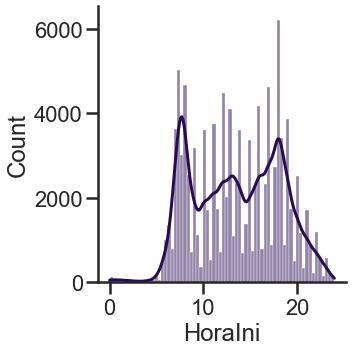

In [21]:
sns.displot(trip_data.HoraIni / pd.Timedelta(hours=1), kde = True)

In [22]:

trip_data['departure_time'] = trip_data.HoraIni / pd.Timedelta(hours=1)

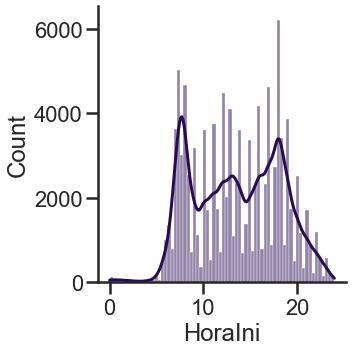

In [23]:
sns.displot(trip_data.HoraIni / pd.Timedelta(hours=1), kde = True)

C:\Users\Alpaca\miniconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\Alpaca\miniconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\Alpaca\miniconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\Alpaca\miniconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\Alpaca\miniconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and

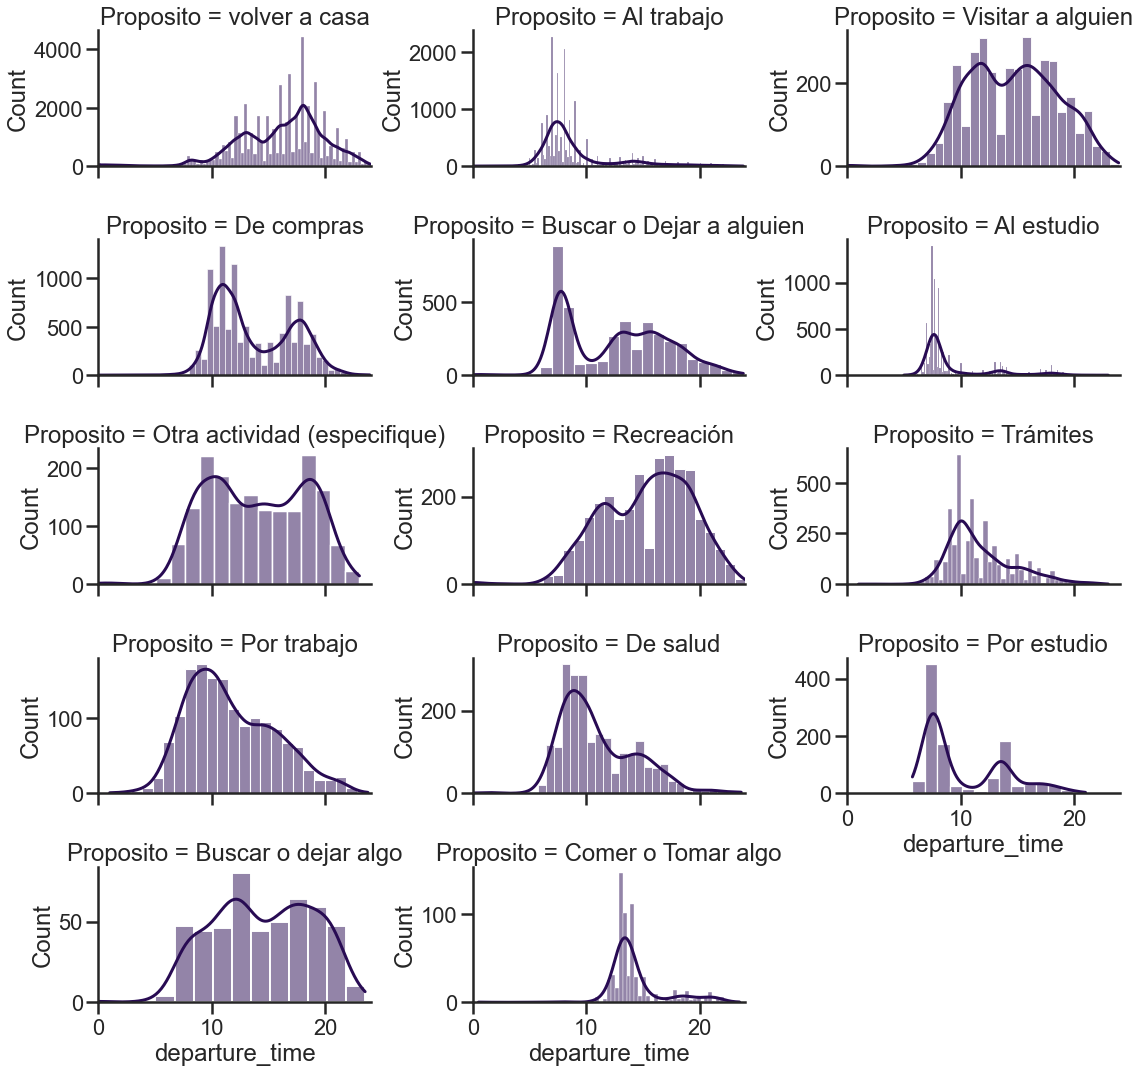

In [24]:
asdf = sns.FacetGrid(data=trip_data, col='Proposito', col_wrap=3, sharey=False, aspect=1.75)
asdf.map(sns.histplot, 'departure_time', kde = True)
asdf.set(xlim=(0,24))

In [25]:
people_data = (pd.read_csv('./carto-en-python/input/2012_eod_stgo/EOD_STGO/personas.csv', sep=';', index_col='Persona')
               .assign(Sexo=lambda x: decode_column(x, './carto-en-python/input/2012_eod_stgo/EOD_STGO/Tablas_parametros/Sexo.csv', 'Sexo', sep=';'))
               .assign(Relacion=lambda x: decode_column(x, './carto-en-python/input/2012_eod_stgo/EOD_STGO/Tablas_parametros/Relacion.csv', 'Relacion', sep=';'))
               .assign(Ocupacion=lambda x: decode_column(x, './carto-en-python/input/2012_eod_stgo/EOD_STGO/Tablas_parametros/Ocupacion.csv', 'Ocupacion', sep=';'))
              )
people_data.head()

,Hogar,AnoNac,Sexo,Relacion,Viajes,LicenciaConducir,PaseEscolar,AdultoMayor,Estudios,Curso,...,TramoIngreso,IngresoFinal,TramoIngresoFinal,IngresoImputado,Factor_LaboralNormal,Factor_SabadoNormal,Factor_DomingoNormal,Factor_LaboralEstival,Factor_FindesemanaEstival,Factor
Persona,,,,,,,,,,,,,,,,,,,,,
10001001,100010,1958,Hombre,Jefe(a) de Hogar,2,3,2,2,4.0,8.0,...,2,240000,2,0,NaN,NaN,"1668,26000",NaN,NaN,"82,58553"
10001002,100010,1956,Mujer,Cónyuge o pareja,5,1,2,2,5.0,1.0,...,0,0,0,0,NaN,NaN,"852,11370",NaN,NaN,"99,53422"
10001003,100010,1982,Mujer,Hijo o Hija,0,1,2,2,7.0,4.0,...,2,210845,2,2,NaN,NaN,"1609,16300",NaN,NaN,"151,59367"
10002001,100020,1954,Hombre,Jefe(a) de Hogar,4,3,2,2,4.0,8.0,...,1,133000,1,0,"169,50230",NaN,NaN,NaN,NaN,"45,21325"
10002002,100020,1961,Mujer,Cónyuge o pareja,2,1,2,2,4.0,8.0,...,1,193000,1,0,"43,26765",NaN,NaN,NaN,NaN,"25,62248"


In [26]:
trip_data = trip_data.join(people_data.loc[:,('Sexo', 'Relacion', 'Ocupacion')], on='Persona')

In [27]:
trip_data.sample(5)

,Hogar,Persona,Etapas,ComunaOrigen,ComunaDestino,SectorOrigen,SectorDestino,ZonaOrigen,ZonaDestino,OrigenCoordX,...,FactorFindesemanaEstival,CodigoTiempo,ModoDifusion,DistEuclidiana,DistManhattan,Imputada,departure_time,Sexo,Relacion,Ocupacion
Viaje,,,,,,,,,,,,,,,,,,,,,
2549510301,254951,25495103,1,SAN BERNARDO,SANTIAGO,Sur,Centro,765,48,"342429,6875",...,NaN,0.0,Otros,20500,24292,0,6.500000,Hombre,Hijo o Hija,Empleado u obrero del sector privado
2695110103,269511,26951101,1,PROVIDENCIA,PROVIDENCIA,Oriente,Oriente,515,515,NaN,...,NaN,0.0,Caminata,223,-1,1,14.833333,Hombre,Jefe(a) de Hogar,Empleado u obrero del sector privado
2164500504,216450,21645005,1,PUDAHUEL,PUDAHUEL,Poniente,Poniente,526,526,NaN,...,NaN,0.0,Caminata,63,-1,1,15.333333,Hombre,Hijo o Hija,NaN
2587110102,258711,25871101,1,SAN BERNARDO,SAN BERNARDO,Sur,Sur,761,770,"344133,3438",...,NaN,NaN,Caminata,627,886,0,13.500000,Mujer,Jefe(a) de Hogar,NaN
1287410102,128741,12874101,1,SAN RAMON,LA CISTERNA,Sur,Sur,656,187,"348178,5",...,NaN,0.0,Bicicleta,1801,2200,0,13.000000,Hombre,Jefe(a) de Hogar,Trabajador por cuenta propia


Ahora podemos desagregar el gráfico por más variables:

C:\Users\Alpaca\miniconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\Alpaca\miniconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\Alpaca\miniconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\Alpaca\miniconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\Alpaca\miniconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and

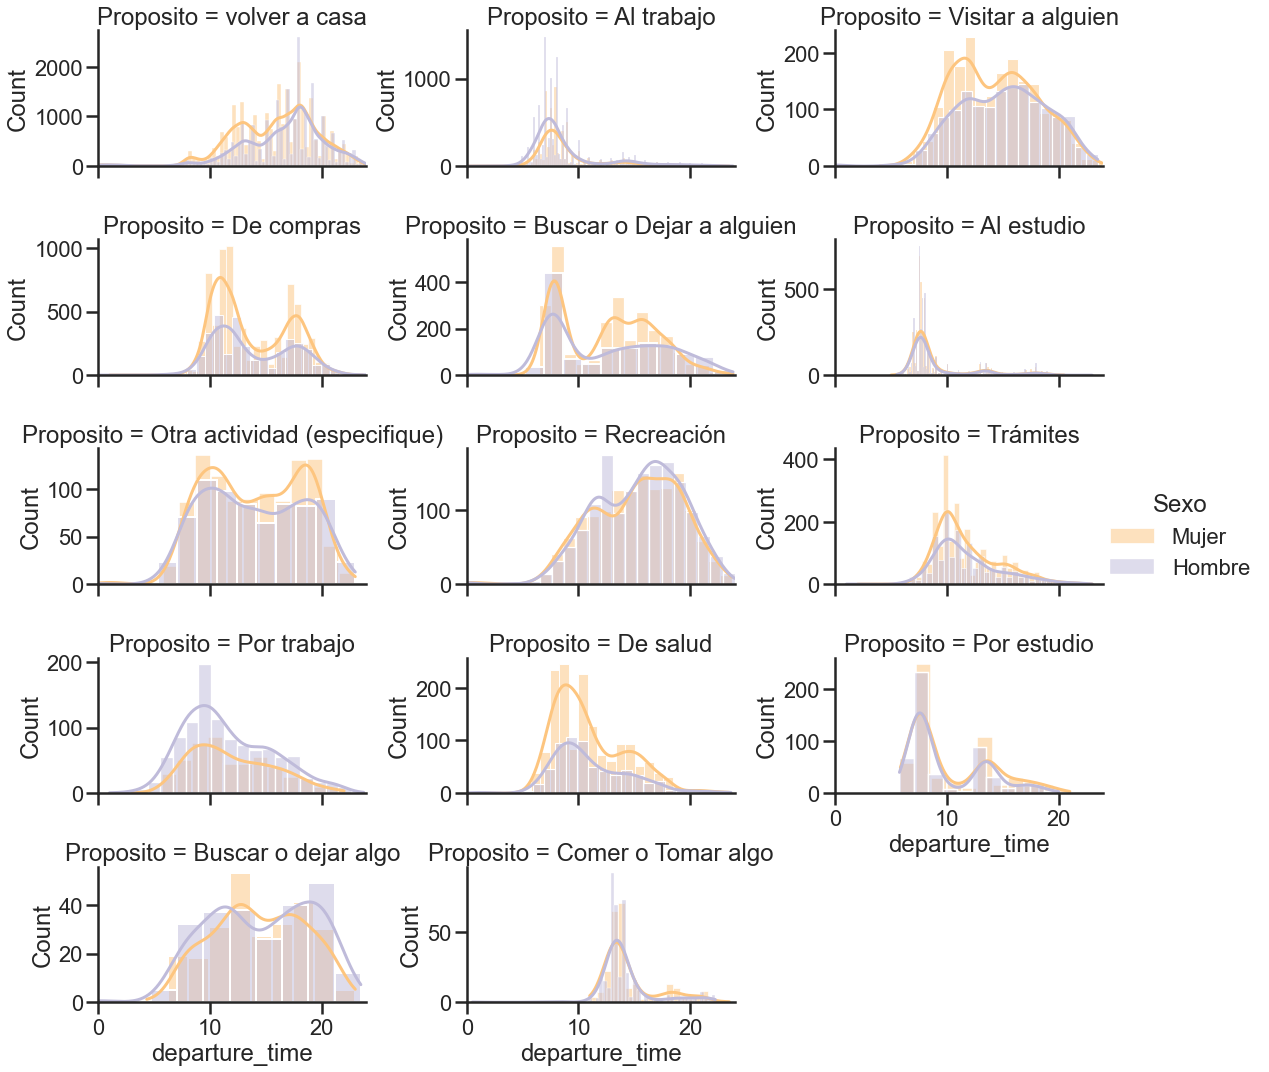

In [28]:
g = sns.FacetGrid(data=trip_data, col='Proposito', hue='Sexo', col_wrap=3, sharey=False, aspect=1.75, palette='PuOr')
g.map(sns.histplot, 'departure_time', kde = True)
g.set(xlim=(0,24))
g.add_legend()

C:\Users\Alpaca\miniconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\Alpaca\miniconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\Alpaca\miniconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\Alpaca\miniconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\Alpaca\miniconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and

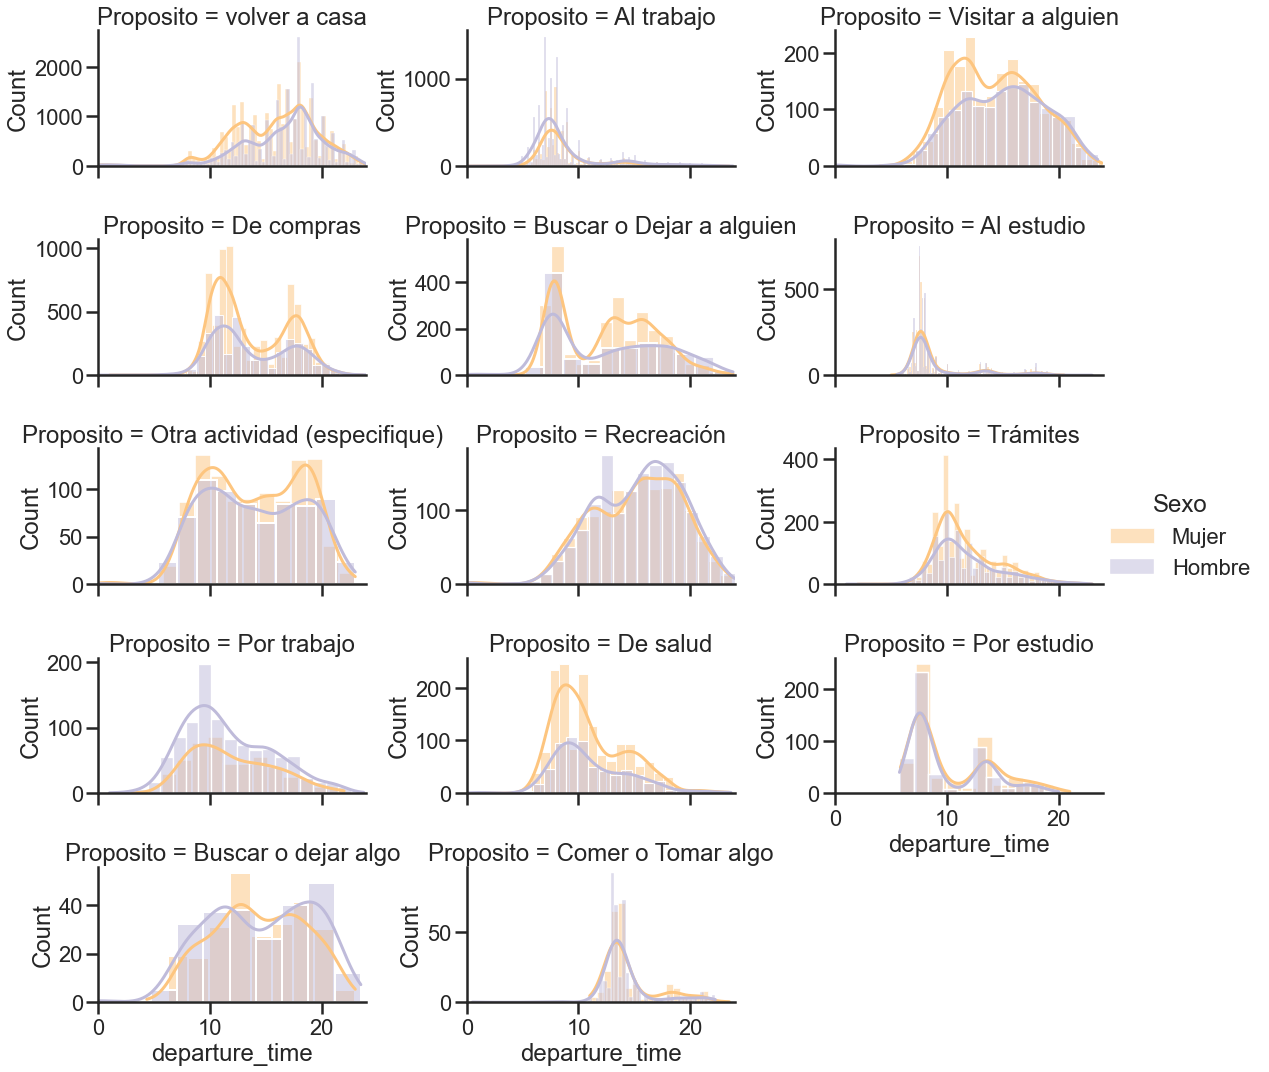

In [29]:
g = sns.FacetGrid(data=trip_data, col='Proposito', hue='Sexo', col_wrap=3, sharey=False, aspect=1.75, palette='PuOr')
g.map(sns.histplot, 'departure_time', kde = True)
g.set(xlim=(0,24))
g.add_legend()

In [30]:
ocupations = trip_data.Ocupacion.value_counts()
ocupations

Empleado u obrero del sector privado                               35136
Trabajador por cuenta propia                                       10578
Enpleado u obrero de empresas públicas                              2155
Empleado u obrero del sector público (Gob. Central o Municipal)     1513
Servicio doméstico puertas afuera                                   1440
Patrón o empleador                                                  1426
Servicio doméstico puertas adentro                                   303
FF.AA. Y del Orden                                                   257
Familiar no remunerado                                                34
Name: Ocupacion, dtype: int64

C:\Users\Alpaca\miniconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\Alpaca\miniconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\Alpaca\miniconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\Alpaca\miniconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\Alpaca\miniconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and

C:\Users\Alpaca\miniconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\Alpaca\miniconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\Alpaca\miniconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\Alpaca\miniconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\Alpaca\miniconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and

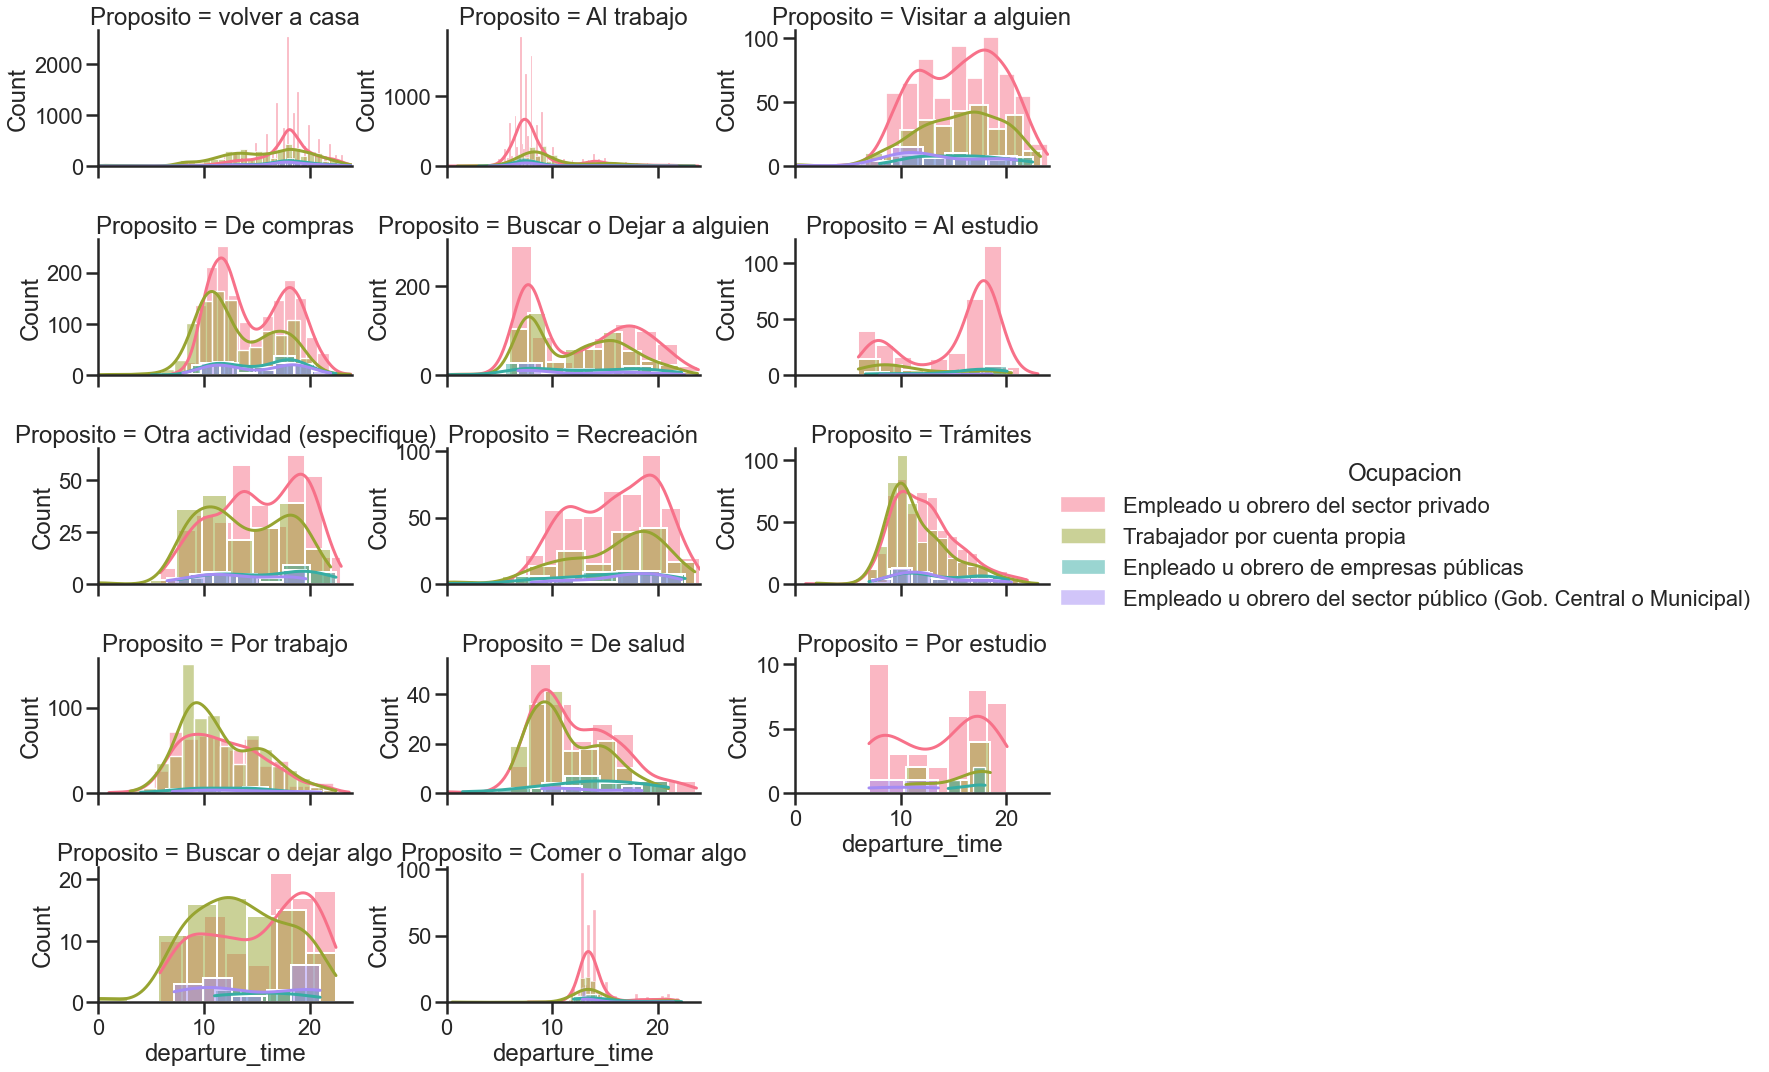

In [31]:
g = sns.FacetGrid(data=trip_data, col='Proposito', hue='Ocupacion', col_wrap=3, sharey=False, aspect=1.75, palette='husl',
                 hue_order=ocupations.index[0:4])
g.map(sns.histplot, 'departure_time', kde = True)
g.set(xlim=(0,24))
g.add_legend()